In [ ]:
!pip install pandas
!pip install seaborn


In [149]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 7.5 MB/s  0:00:01eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [21]:
!pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 8.8 MB/s  0:00:01 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


# Investigate on Nutrition and Disease Patterns in the Heliad Study Population
___
_An initial attempt to investigate links between adherence to a mediterranean diet (assumed by specific food groups) and diseases of the elderly._

## Definitions

The following dictionary `nutridict` maps the food-related columns from the Heliad dataset to the keys defined in the respective mapping file which is external to this code project.

In [37]:
nutridict = {
    "FFQ1": "Milk_Yoghurt",
    "FFQ2": "Milk_Yoghurt_LowFat",
    "FFQ3": "Yellow_Cheese",
    "FFQ4": "Feta_Cheese",
    "FFQ5": "Cheese_LowFat",
    "FFQ6": "Eggs",
    "FFQ7": "White_Bread",
    "FFQ8": "Wholemeal_Bread",
    "FFQ11": "Cereals",
    "FFQ12": "White_Rice",
    "FFQ13": "Brown_Rice",
    "FFQ14": "Pasta",
    "FFQ15": "Pasta_Wholemeal",
    "FFQ16": "Potatoes_Boiled",
    "FFQ17": "Potatoes_Fried",
    "FFQ18": "Veal",
    "FFQ19": "Meat_Balls",
    "FFQ20": "Chicken",
    "FFQ21": "Pork",
    "FFQ22": "Lamb_Goat_Game",
    "FFQ23": "Meat_Cold_Sliced",
    "FFQ24": "Sausages",
    "FFQ25": "Meat_Cold_Sliced_LowFat",
    "FFQ26": "Fish_Small",
    "FFQ27": "Fish_Large",
    "FFQ28": "Seafood_Misc",
    "FFQ29": "Legumes",
    "FFQ30": "Spinach",
    "FFQ31": "Pastitsio_Moussaka_Papoutsakia",
    "FFQ32": "Petit_Pois",
    "FFQ33": "Tomato_Cucumber_Carrot_Pepper",
    "FFQ34": "Lettuce_Cabbage_Spinach_Rocket",
    "FFQ35": "Broccoli_Cauliflower_Courgette",
    "FFQ37": "Orange",
    "FFQ38": "Apples_Pears",
    "FFQ39": "Winter_Fruits_Misc",
    "FFQ40": "Banana",
    "FFQ41": "Summer_Fruits_Misc",
    "FFQ43": "Fruits_Dried",
    "FFQ44": "Nuts",
    "FFQ45": "Pies",
    "FFQ46": "Pies",
    "FFQ48": "Cakes",
    "FFQ49": "Sweets_Preserved",
    "FFQ50": "Cakes",
    "FFQ51": "Cakes",
    "FFQ52": "Chocolate",
    "FFQ53": "Ice_Cream",
    "FFQ54": "Salty_Snacks",
    "FFQ55": "Honey_Marmalade",
    "FFQ56": "Olives",
    "FFQ57": "Wine",
    "FFQ58": "Beer",
    "FFQ59": "Alcohold_Misc",
    "FFQ60": "Soda",
    "FFQ61": "Soda",
    "FFQ62": "Coffee",
    "FFQ63": "Tea",
    "FFQ64": "Mayonnaise",
    "FFQ65": "Mayonnaise",
    "FFQ66": "Olive_Oil_Freq",
    "FFQ67": "Seed_Oil_Freq",
    "FFQ68": "Margarine_Freq",
    "FFQ69": "Butter_Freq"
}

The following `nutri_dict_grouped` dictionary maps foods into categories or groups of foods. The food groups relevant to the mediterranean diet or the western-type diet can be derived implicitly according to the common and well-known definitions.

In [12]:
nutri_dict_grouped = {
    "Dairy": [
        "Milk_Yoghurt",
        "Milk_Yoghurt_LowFat",
        "Yellow_Cheese",
        "Feta_Cheese",
        "Cheese_LowFat"
    ],
    "Refined_Grains": [
        "White_Bread",
        "Cereals",
        "White_Rice",
        "Pasta"
    ],
    "Whole_Grains": [
        "Wholemeal_Bread",
        "Brown_Rice",
        "Pasta_Wholemeal"
    ],
    "Red_Meats": [
        "Veal",
        "Pork",
        "Lamb_Goat_Game"
    ],
    "Processed_Foods": [
        "Potatoes_Fried",
        "Meat_Balls",
        "Meat_Cold_Sliced",
        "Meat_Cold_Sliced_LowFat",
        "Salty_Snacks",
        "Mayonnaise",
        "Soda",
        "Sausages"
    ],
    "Seafood": [
        "Fish_Small",
        "Fish_Large",
        "Seafood_Misc"
    ],
    "Vegetables": [
        "Potatoes_Boiled",
        "Spinach",
        "Tomato_Cucumber_Carrot_Pepper",
        "Lettuce_Cabbage_Spinach_Rocket",
        "Broccoli_Cauliflower_Courgette"
    ],
    "Fruits": [
        "Orange",
        "Apples_Pears",
        "Winter_Fruits_Misc",
        "Banana",
        "Summer_Fruits_Misc"
    ],
    "Composite_Dishes": [
        "Pastitsio_Moussaka_Papoutsakia",
        "Pies"
    ],
    "Sweets": [
        "Cakes",
        "Sweets_Preserved",
        "Chocolate",
        "Ice_Cream",
        "Honey_Marmalade"
    ],
    "Alcohol": [
        "Wine",
        "Beer",
        "Alcohold_Misc"
    ]
}

Apart from foods that can be grouped since they fall into a particular category, there also some that have more of a 'standalone' character. Those are defined in the following `single_items` dictionary. Likewise to the grouped dictionary defined above, the foods from the below can also be implicitly be assigned to either mediterranean -or western diet based.

In [36]:
single_items = {
    "Eggs": "Eggs",
    "Chicken": "Chicken",
    "Legumes": "Legumes",
    "Petit_Pois": "Petit_Pois",
    "Fruits_Dried": "Fruits_Dried",
    "Nuts": "Nuts",
    "Olives": "Olives",
    "Coffee": "Coffee",
    "Tea": "Tea",
    "Olive_Oil_Freq": "Olive_Oil_Freq",
    "Seed_Oil_Freq": "Seed_Oil_Freq",
    "Margarine_Freq": "Margarine_Freq",
    "Butter_Freq": "Butter_Freq"
}

In the present form of the dataset, particular clinical outcomes regarding cognitive and otherwise clinical examination results aren't available. Therefore the present analysis proceeds with the ones available and decoded in the dictionary below.

In [5]:
medical_features = {
    'I11c': 'Constipation',
    'I9': 'REM_Sleep_Behavior_Disorder',
    'I6': 'Motor_Symptoms_Parkinsonism',
    'I1a': 'Fluctuation_Consciousness',
    'I1b': 'Fluctuation_Cognition',
    'I11a': 'Orthostatic_Hypotension',
    'I4a': 'Episodes_Blank_Switch_Off'
}

## Nutrition pattern analysis
Here we try to explore the nutrition patterns of the population from a birds-eye perspective. What are the most frequently consumed foods? How does the distribution of food groups among the study's population look like?

### Subset dataset with relevant parts
Below the dataset is read demographic columns mapped, food-related columns and clinical outcomes are renamed, the biological gender is decoded and NA-columns dropped.

In [89]:
import pandas as pd
hdata = pd.read_csv("OUTCOME_DIAGNOSIS_processed.csv", header=0)

Here we proceed with subsetting the larger dataset. For starters, the only demographic variables that are kept are participant's age, sex and body-mass index.

In [7]:
demographic_cols = ['AgeC', 'SexD', 'BMI']

In [93]:
category_to_ffq = {}
for ffq, category in nutridict.items():
    if ffq in hdata.columns:
        if category not in category_to_ffq:
            category_to_ffq[category] = []
        category_to_ffq[category].append(ffq)

for category, ffq_cols in category_to_ffq.items():
    if len(ffq_cols) == 1:
        hdata[category] = hdata[ffq_cols[0]]
    else:
        hdata[category] = hdata[ffq_cols].max(axis=1, skipna=True)

nutrition_cols = list(category_to_ffq.keys())

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_18621/1135121515.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hdata[category] = hdata[ffq_cols[0]]
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_18621/1135121515.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hdata[category] = hdata[ffq_cols].max(axis=1, skipna=True)
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_18621/1135121515.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

In [92]:
hdata['SexD'] = hdata['SexC'].replace({1: 'Male', 2: 'Female'})

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_18621/3524703997.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hdata['SexD'] = hdata['SexC'].replace({1: 'Male', 2: 'Female'})


In [94]:
available_medical = [col for col in medical_features.keys() if col in hdata.columns]
print(f"Found {len(available_medical)}/{len(medical_features)} medical features in dataset")

subset_cols = demographic_cols + available_medical + nutrition_cols + ["ZME", "ZEX", "ZVS", "ZLA", "ZAS", "ZCO"]
heliad_subset = hdata[subset_cols].copy()

heliad_subset = heliad_subset.rename(columns=medical_features)
heliad_subset = heliad_subset.dropna()

Found 7/7 medical features in dataset


In [95]:
heliad_subset.shape
heliad_subset.to_csv("./heliad_nutri_subset.csv")

### Foods Grouping
A strategy where food items are grouped into respective categories is used, resulting in a different approach to the one used by [Anastasiou et al. 2017](https://doi.org/10.1371/journal.pone.0182048), where the inferred MedDietScore was used. In the approach presented here, z-scores are calculated for each food in the groups defined in `nutri_dict_grouped` dictionary in order to standardize the consumption frequency.

In [35]:
category_colors = {
    'Dairy': 'lightblue',
    'Refined_Grains': 'wheat',
    'Whole_Grains': 'lightcoral',
    'Red_Meats': 'lightgreen',
    'Processed_Foods': 'gold',
    'Seafood': 'pink',
    'Vegetables': 'plum',
    'Fruits': 'lavender',
    'Composite_Dishes': 'lightgray',
    'Sweets': 'purple',
    'Alcohol': 'red',
    'Eggs': '#FFFACD',
    'Chicken': '#B0E0E6',
    'Legumes': '#A0522D',
    'Petit_Pois': '#32CD32',
    'Fruits_Dried': '#FFA07A',
    'Nuts': '#CD853F',
    'Olives': '#6B8E23',
    'Coffee': '#8B4513',
    'Tea': '#228B22',
    'Olive_Oil_Freq': '#DAA520',
    'Seed_Oil_Freq': '#FFD700',
    'Margarine_Freq': '#FFF8DC',
    'Butter_Freq': '#FFE4B5'
}

Here, the z-standardized consumption is displayed per food group. The visualization provides an overview of the nutritional patterns in detail and reflects a qualitative degree of adherence to the mediterranean diet.

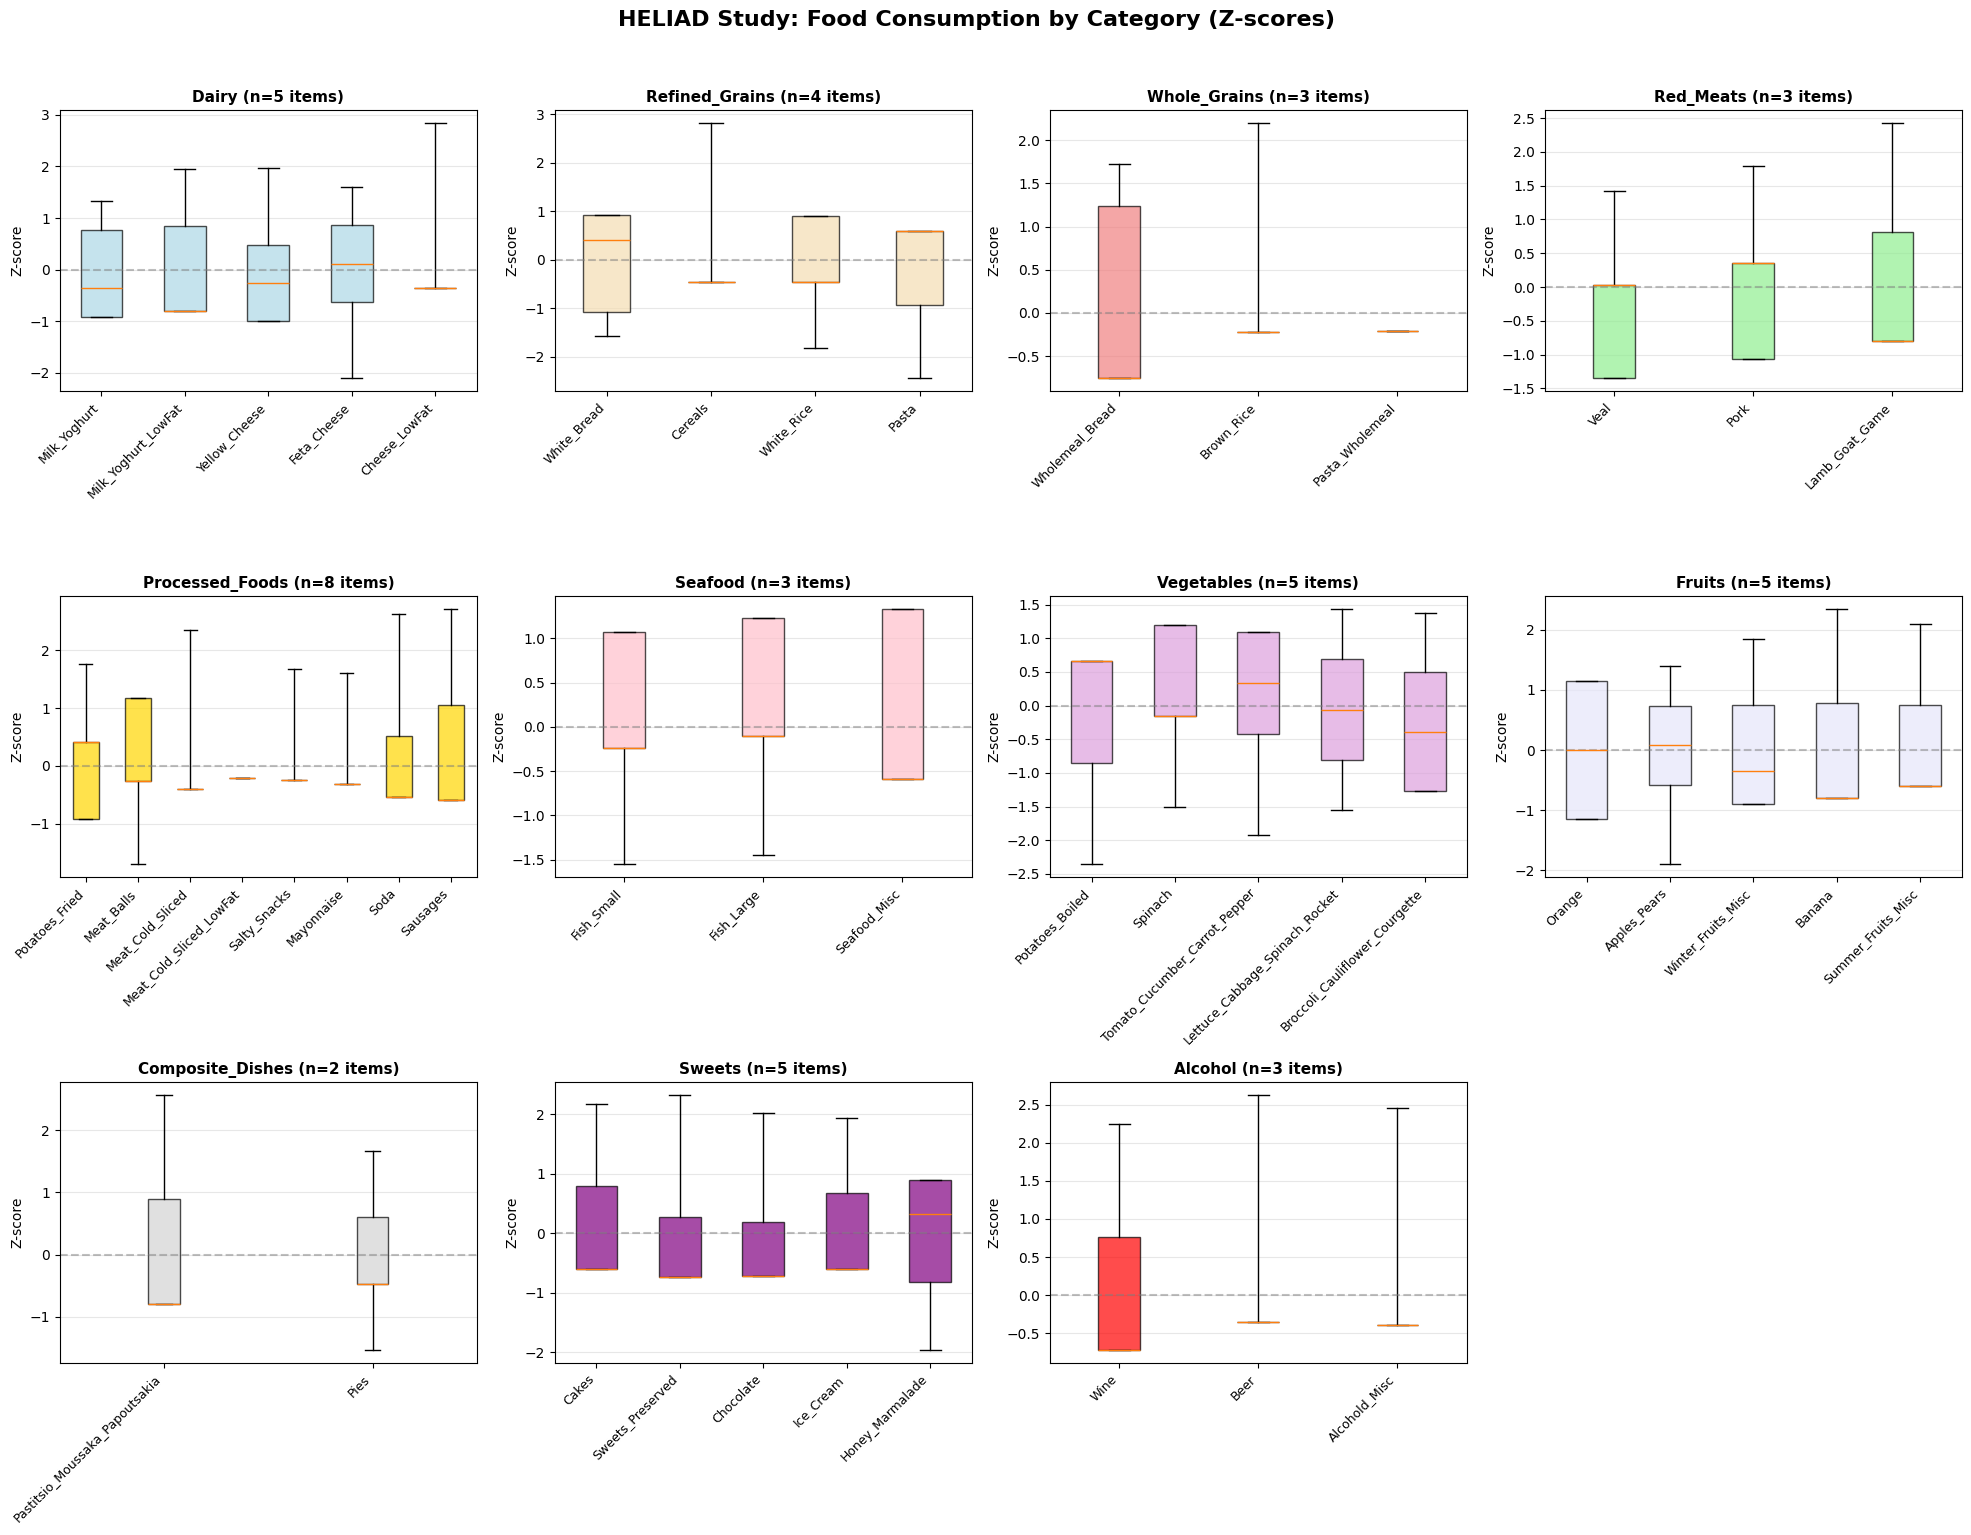

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for idx, (category, foods) in enumerate(nutri_dict_grouped.items()):
        
    ax = axes[idx]
    
    category_data = []
    category_labels = []
    
    for food in foods:
        for ffq_code, food_name in nutridict.items():
            if food_name == food:
                data = hdata[ffq_code].dropna()
                if len(data) > 0:
                    z_data = (data - data.mean()) / data.std()
                    category_data.append(z_data)
                    category_labels.append(food)
                    break
    
    if category_data:
        bp = ax.boxplot(category_data, vert=True, patch_artist=True,
                       showfliers=False, whis=[5, 95])
        
        for patch in bp['boxes']:
            patch.set_facecolor(category_colors[category])
            patch.set_alpha(0.7)
        
        ax.set_xticks(range(1, len(category_labels) + 1))
        ax.set_xticklabels(category_labels, rotation=45, ha='right', fontsize=9)
        ax.set_ylabel('Z-score')
        ax.set_title(f'{category} (n={len(category_data)} items)', 
                    fontsize=11, fontweight='bold')
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)  # Reference line
        ax.grid(True, alpha=0.3, axis='y')

    axes[11].set_visible(False)

plt.suptitle('HELIAD Study: Food Consumption by Category (Z-scores)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Foods that make up a group of there own are defined in `single_items` and presented also with the z-standardized consumption below. These foods are either mediterranean diet hallmarks, like olive oil, or were not assignable to any of the major groups defined prior and further handled as single items.

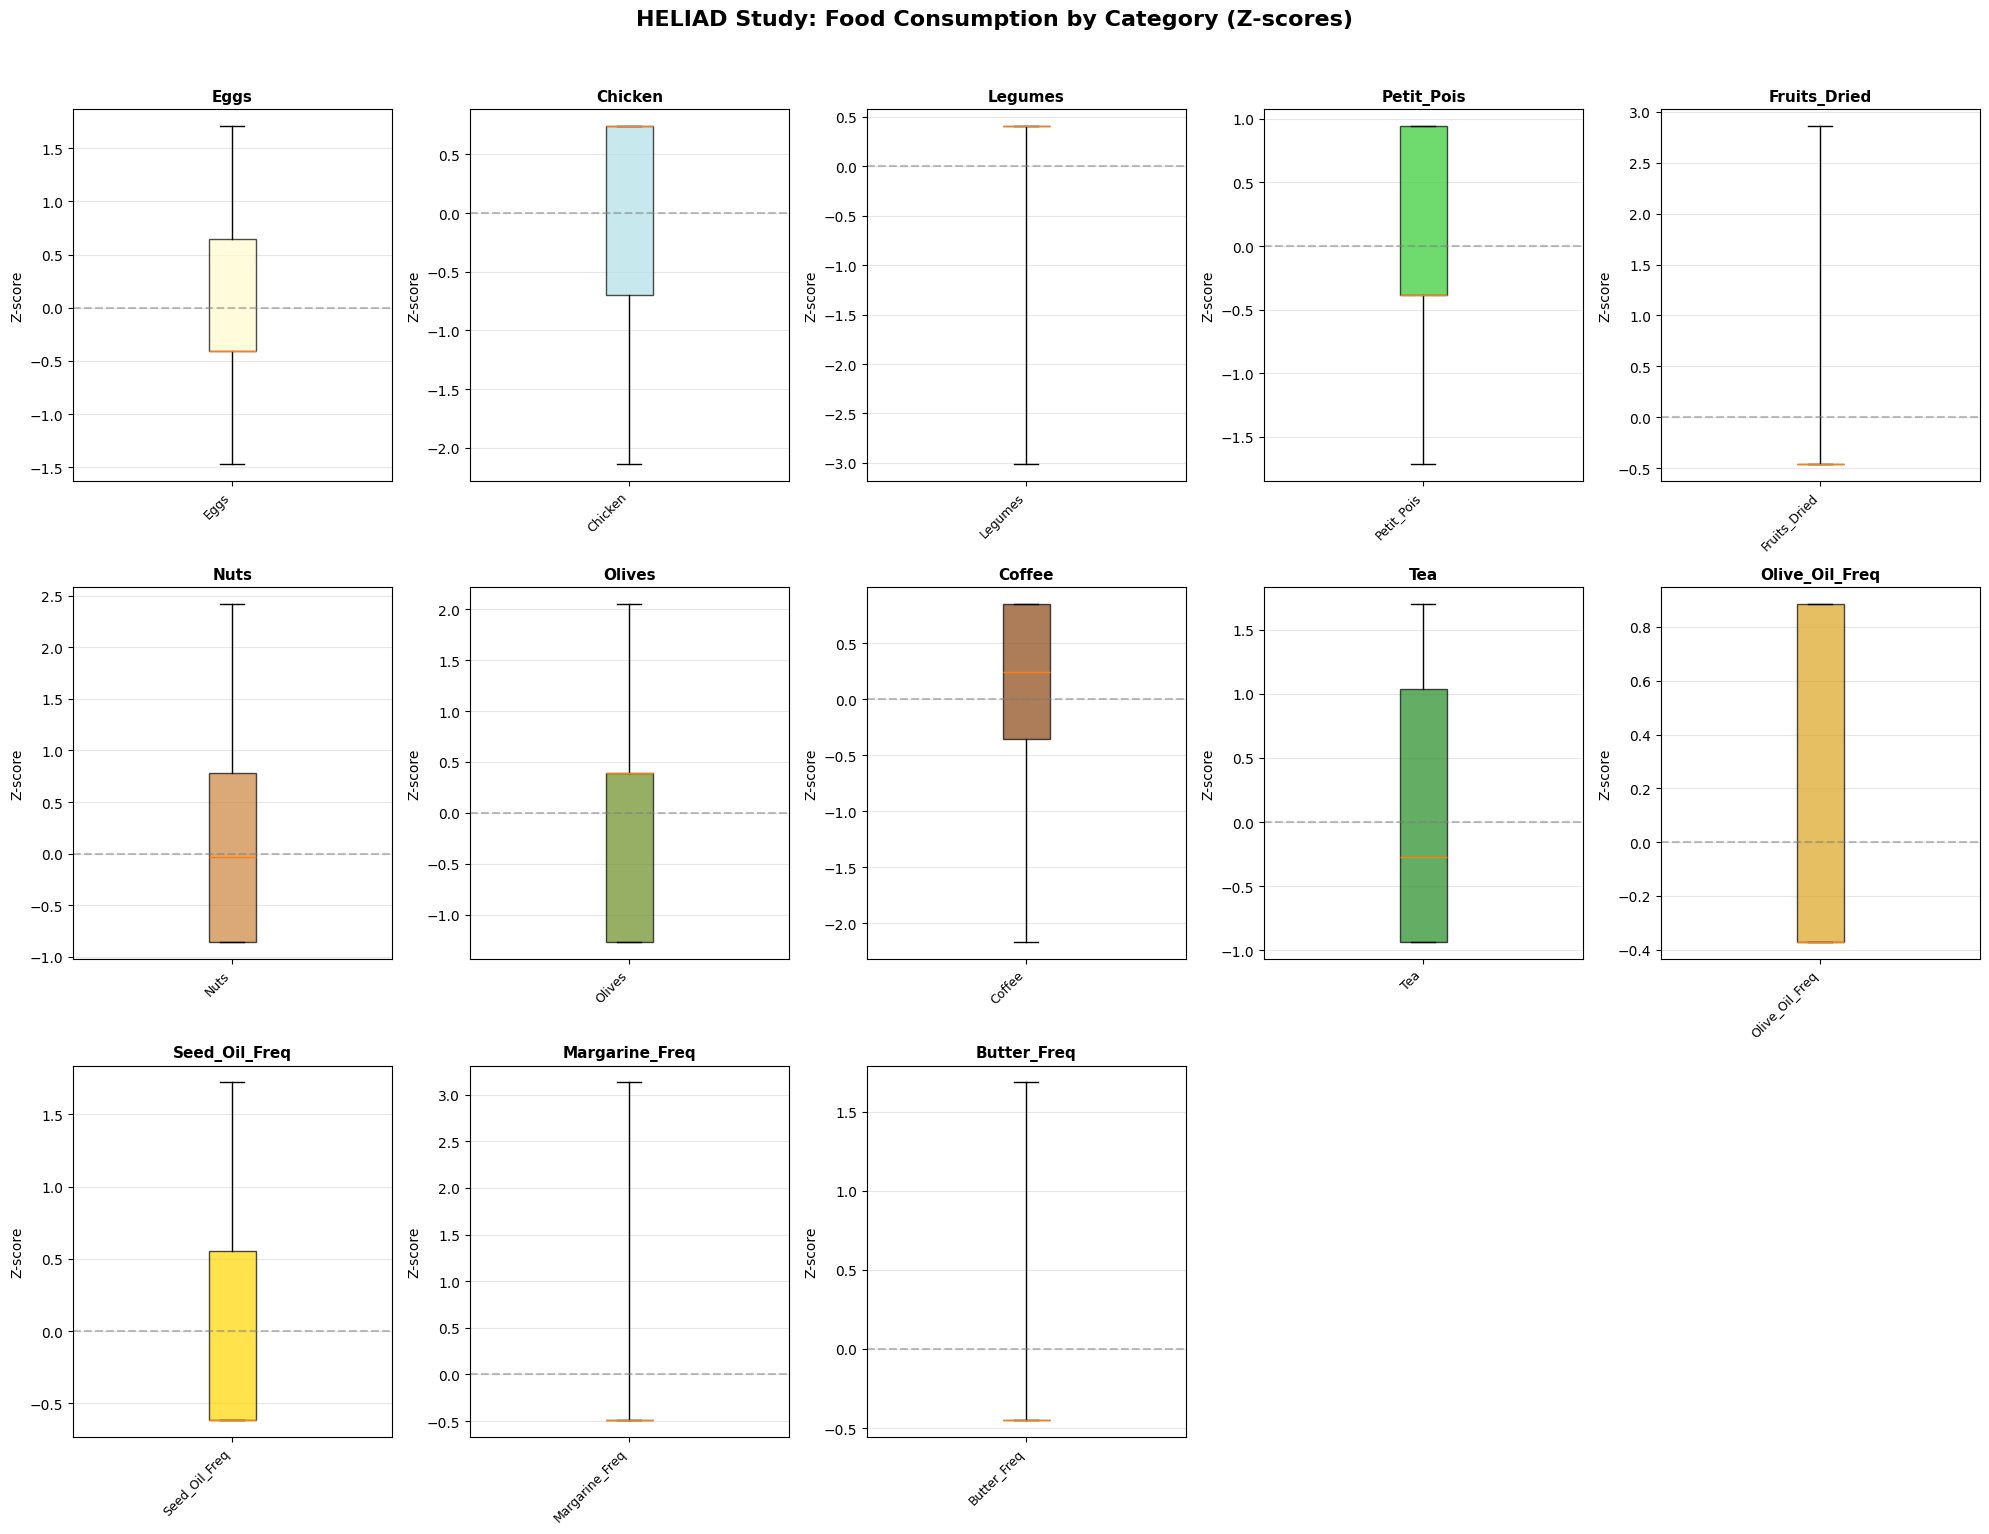

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.flatten()

for idx, (category, food) in enumerate(single_items.items()):
        
    ax = axes[idx]
    
    category_data = []
    category_labels = []
    
    for ffq_code, food_name in nutridict.items():
        if food_name == food:
            data = hdata[ffq_code].dropna()
            if len(data) > 0:
                z_data = (data - data.mean()) / data.std()
                category_data.append(z_data)
                category_labels.append(food)
                break
    
    if category_data:
        bp = ax.boxplot(category_data, vert=True, patch_artist=True,
                       showfliers=False, whis=[5, 95])
        
        for patch in bp['boxes']:
            patch.set_facecolor(category_colors[category])
            patch.set_alpha(0.7)
        
        ax.set_xticks(range(1, len(category_labels) + 1))
        ax.set_xticklabels(category_labels, rotation=45, ha='right', fontsize=9)
        ax.set_ylabel('Z-score')
        ax.set_title(f'{category}', 
                    fontsize=11, fontweight='bold')
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)  # Reference line
        ax.grid(True, alpha=0.3, axis='y')

    axes[13].set_visible(False)
    axes[14].set_visible(False)

plt.suptitle('HELIAD Study: Food Consumption by Category (Z-scores)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Consolidation of standardized consumption frequencies
Mean composites resulting from the z-standardized consumption frequencies are calculated for each study participant. This way, each subject is assigned a score for a particular food group from which the detailed adherence to the mediterranean diet could be inferred.

In [43]:
heliad_subset = pd.read_csv("./heliad_nutri_subset.csv", header=0)

In [96]:
def create_composite(df, items, group_name):       
    print(f"Creating {group_name} from {len(items)} items...")
    
    zscores = pd.DataFrame()
    for item in items:
        mean_val = df[item].mean()
        std_val = df[item].std()
        if std_val > 0: 
            zscores[item] = (df[item] - mean_val) / std_val
        else:
            zscores[item] = 0
    
    composite = zscores.mean(axis=1)
    
    return composite

In [97]:

for group_name, food_items in nutri_dict_grouped.items():
    composite = create_composite(heliad_subset, food_items, group_name)
    
    heliad_subset[f"{group_name}_ZC"] = composite

for group_name, food_items in single_items.items():
    composite = create_composite(heliad_subset, [food_items], group_name)

    heliad_subset[f"{group_name}_ZC"] = composite

Creating Dairy from 5 items...
Creating Refined_Grains from 4 items...
Creating Whole_Grains from 3 items...
Creating Red_Meats from 3 items...
Creating Processed_Foods from 8 items...
Creating Seafood from 3 items...
Creating Vegetables from 5 items...
Creating Fruits from 5 items...
Creating Composite_Dishes from 2 items...
Creating Sweets from 5 items...
Creating Alcohol from 3 items...
Creating Eggs from 1 items...
Creating Chicken from 1 items...
Creating Legumes from 1 items...
Creating Petit_Pois from 1 items...
Creating Fruits_Dried from 1 items...
Creating Nuts from 1 items...
Creating Olives from 1 items...
Creating Coffee from 1 items...
Creating Tea from 1 items...
Creating Olive_Oil_Freq from 1 items...
Creating Seed_Oil_Freq from 1 items...
Creating Margarine_Freq from 1 items...
Creating Butter_Freq from 1 items...


In [98]:
heliad_subset.to_csv("./heliad_nutri_subset_zc.csv")

### Overview of consumption patterns according to the defined food groups
Here we visualize the nutrition pattern based on the defined food groups for the whole study population. It may become apparent which groups follow a mere normal distribution and which display a skew.

In [67]:
food_groups = [f"{v}_ZC" for v in nutri_dict_grouped.keys()]

In [ ]:
food_singles = [f"{v}_ZC" for v in single_items.values()]

In [76]:
import ptitprince as pt
def plot_raincloud(df, variables, title):

    plot_df = df[variables].melt(var_name='Variable', value_name='Z-score')
    plot_df = plot_df.dropna()
    
    plt.figure(figsize=(12, 12))
    
    ax = pt.RainCloud(x='Variable', y='Z-score', data=plot_df,
                     palette='Set2', bw=0.2, width_viol=0.6,
                     ax=None, orient='h', move=0.2, alpha=0.65)
    
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.xlabel('Z-score')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

/Users/kpax/Documents/study/research/HELIAD/code/Heliad-da/.venv/lib/python3.12/site-packages/ptitprince/PtitPrince.py:1070: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


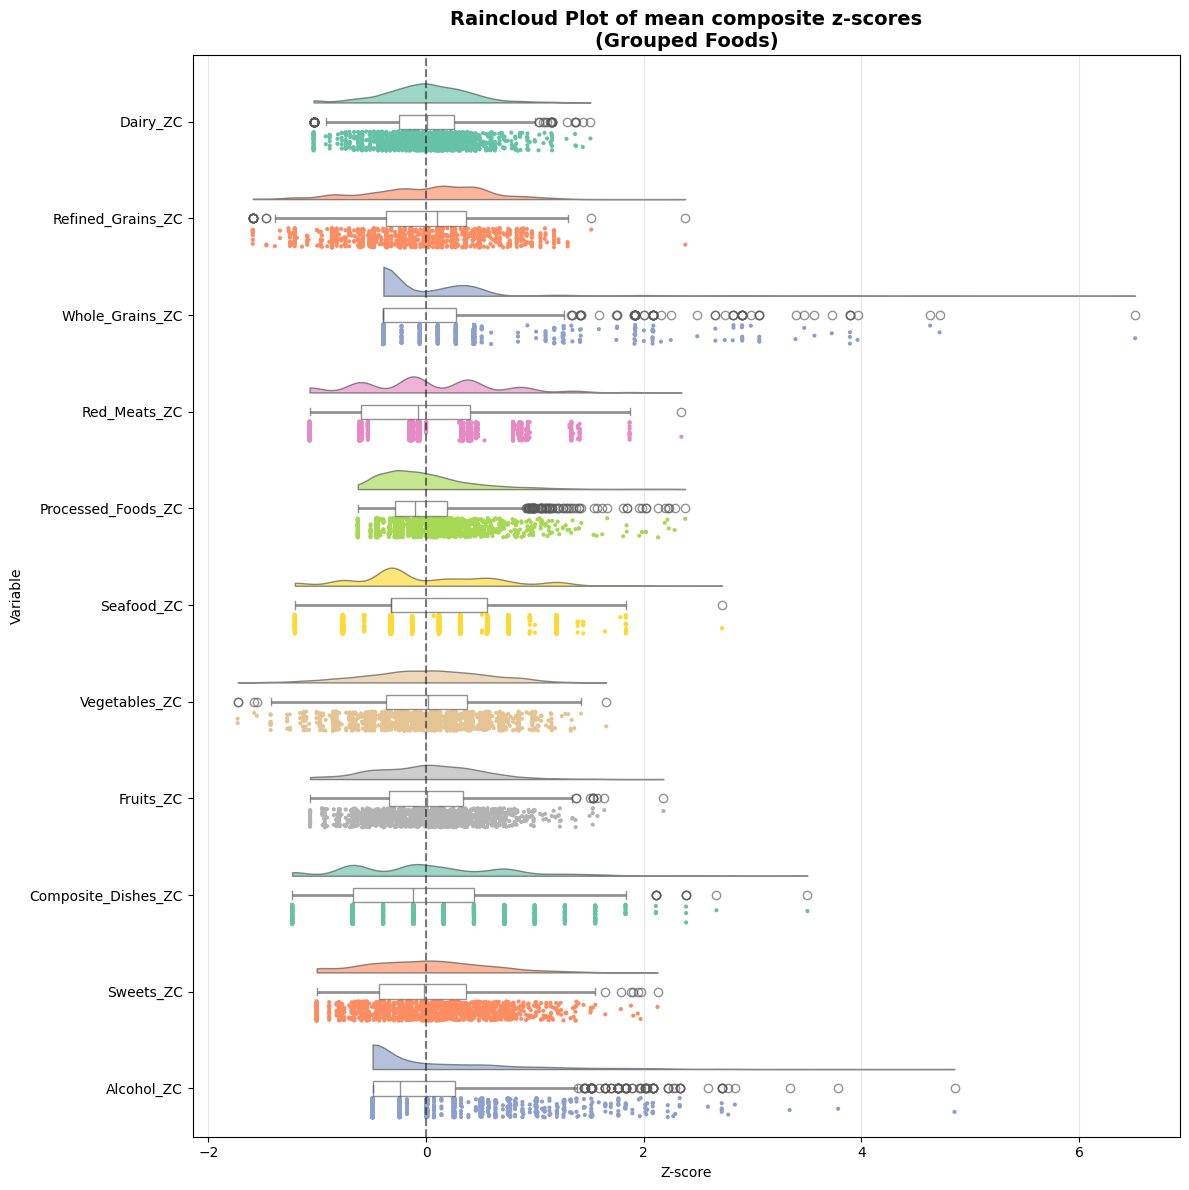

In [78]:
plot_raincloud(heliad_subset, food_groups, 'Raincloud Plot of mean composite z-scores\n(Grouped Foods)')

/Users/kpax/Documents/study/research/HELIAD/code/Heliad-da/.venv/lib/python3.12/site-packages/ptitprince/PtitPrince.py:1070: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


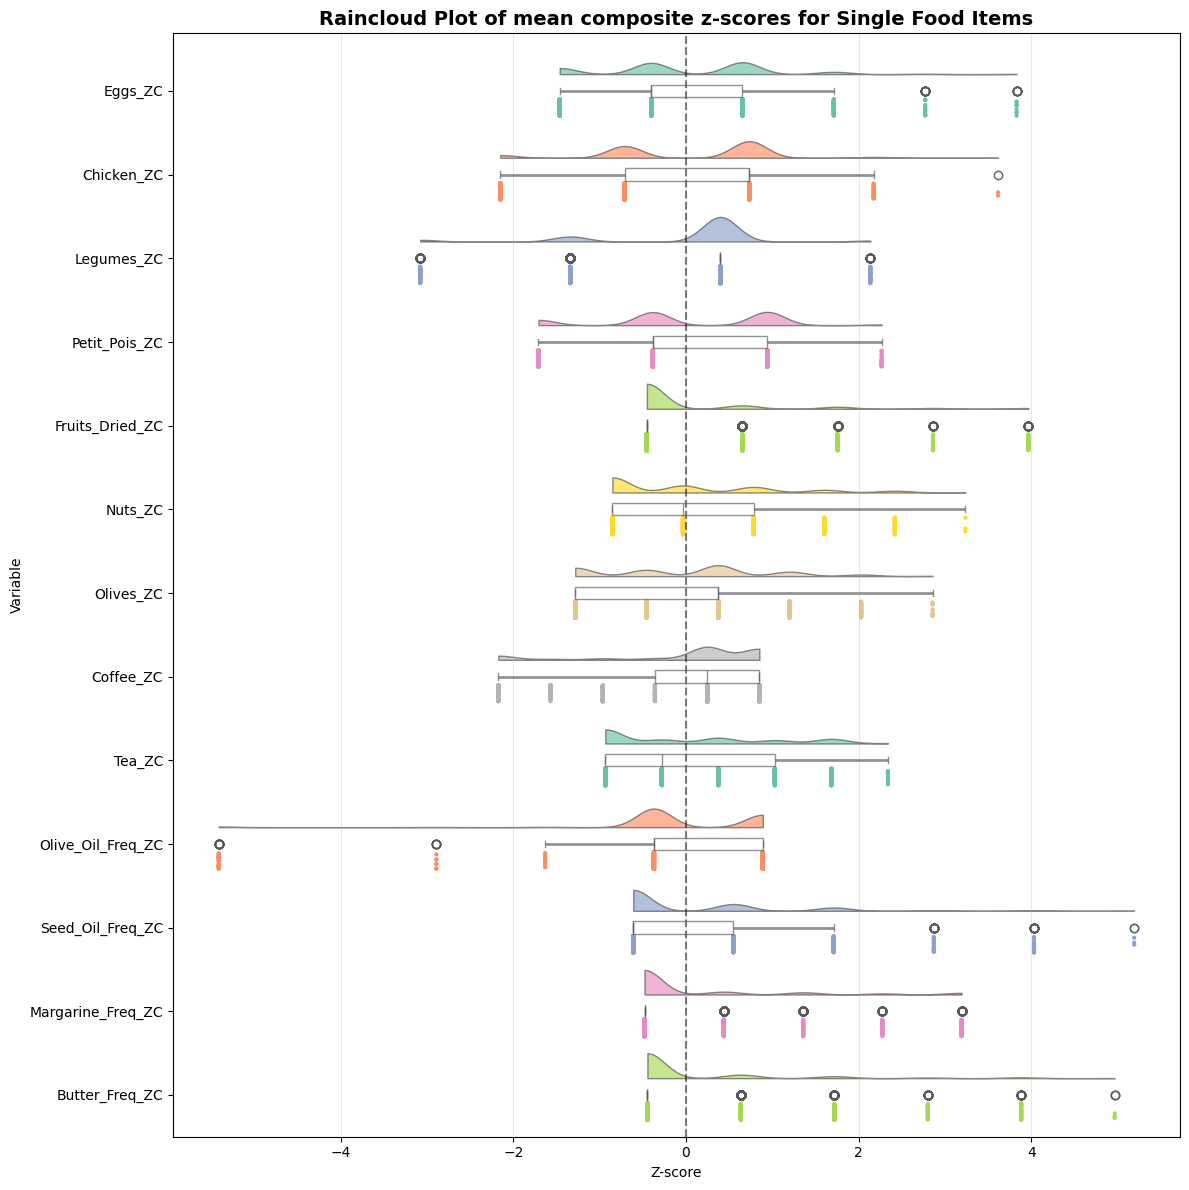

In [79]:
plot_raincloud(heliad_subset, food_singles, 'Raincloud Plot of mean composite z-scores for Single Food Items')

## Disease nutri-graphics
___
What's the disease landscape in regards to dementia? The diagnoses are z-standardized and also included (as I assume) to a composite score. Therefore, the analysis following is based on the ZCO column values, which (presumably) define a z-standardized metric to gauge the degree of dementia for each participant. 

1. At first get the clean ZCO score

In [99]:
zco_data = heliad_subset['ZCO'].dropna()

2. Then provide some statistics for the ZCO. Apparently there is a skewness present in the distribution of the composite cognitive score outcome.

In [103]:
stats_dict = {
    'Mean': zco_data.mean(),
    'Median': zco_data.median(),
    'Std Dev': zco_data.std(),
    'Min': zco_data.min(),
    'Max': zco_data.max(),
    'Range': zco_data.max() - zco_data.min(),
    'IQR': zco_data.quantile(0.75) - zco_data.quantile(0.25),
    'Skewness': zco_data.skew(),
    'Kurtosis': zco_data.kurtosis()
}

for stat, value in stats_dict.items():
    print(f"{stat:15s}: {value:.3f}")

Mean           : -0.184
Median         : -0.075
Std Dev        : 0.754
Min            : -3.826
Max            : 1.153
Range          : 4.980
IQR            : 1.011
Skewness       : -0.971
Kurtosis       : 1.653


3. A histogram showing the distribution of the ZCO. A left-sided skew is present, meaning that most of the participants did well on the cognitive performance evaluation.

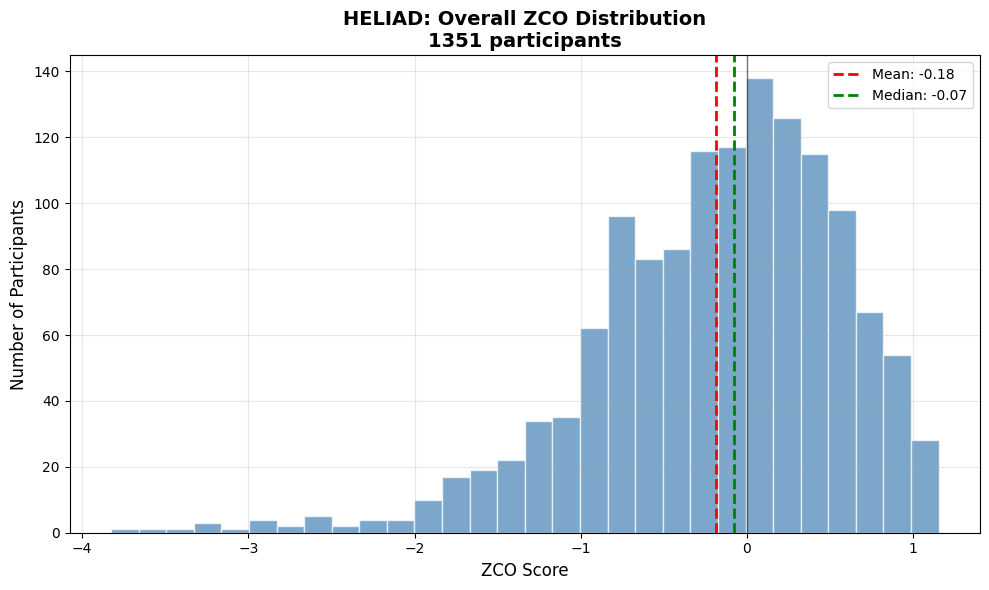

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

plt.hist(zco_data, bins=30, alpha=0.7, color='steelblue', edgecolor='white')

mean_val = zco_data.mean()
median_val = zco_data.median()

plt.axvline(x=mean_val, color='red', linestyle='--', linewidth=2,
           label=f'Mean: {mean_val:.2f}')
plt.axvline(x=median_val, color='green', linestyle='--', linewidth=2,
           label=f'Median: {median_val:.2f}')

plt.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

plt.xlabel('ZCO Score', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.title(f'HELIAD: Overall ZCO Distribution\n{len(zco_data)} participants', 
         fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Arbitrarily defined age groups that capture the ages of the participants. The percentage of observations per age group are presented in the output.

### Investigation of Cognitive Score outcomes per age group
___
Here we investigate on the performance of the cognitive evaluation the different age group's participants. The cognitive decline is apparent in the respective plots.

In [136]:

age_data = heliad_subset['AgeC']
print(f"Age range: {age_data.min():.0f} to {age_data.max():.0f} years")
print(f"Mean age: {age_data.mean():.1f} years")

bins = [60, 70, 80, 90, 105]  # Adjust based on your data
labels = ['60-69', '70-79', '80-89', '90+']

heliad_subset['age_group'] = pd.cut(heliad_subset['AgeC'], bins=bins, labels=labels, right=False)
age_counts = heliad_subset['age_group'].value_counts().sort_index()
for group, count in age_counts.items():
    print(f"  {group}: {count} participants ({count/len(heliad_subset)*100:.1f}%)")

Age range: 66 to 91 years
Mean age: 74.0 years
  60-69: 297 participants (22.0%)
  70-79: 838 participants (62.0%)
  80-89: 213 participants (15.8%)
  90+: 3 participants (0.2%)


Here the age groups are created from the calculated age of each of the study's participants and assigned accordingly.

In [137]:
heliad_subset['age_group'] = pd.cut(heliad_subset['AgeC'], bins=bins, labels=labels, right=False)

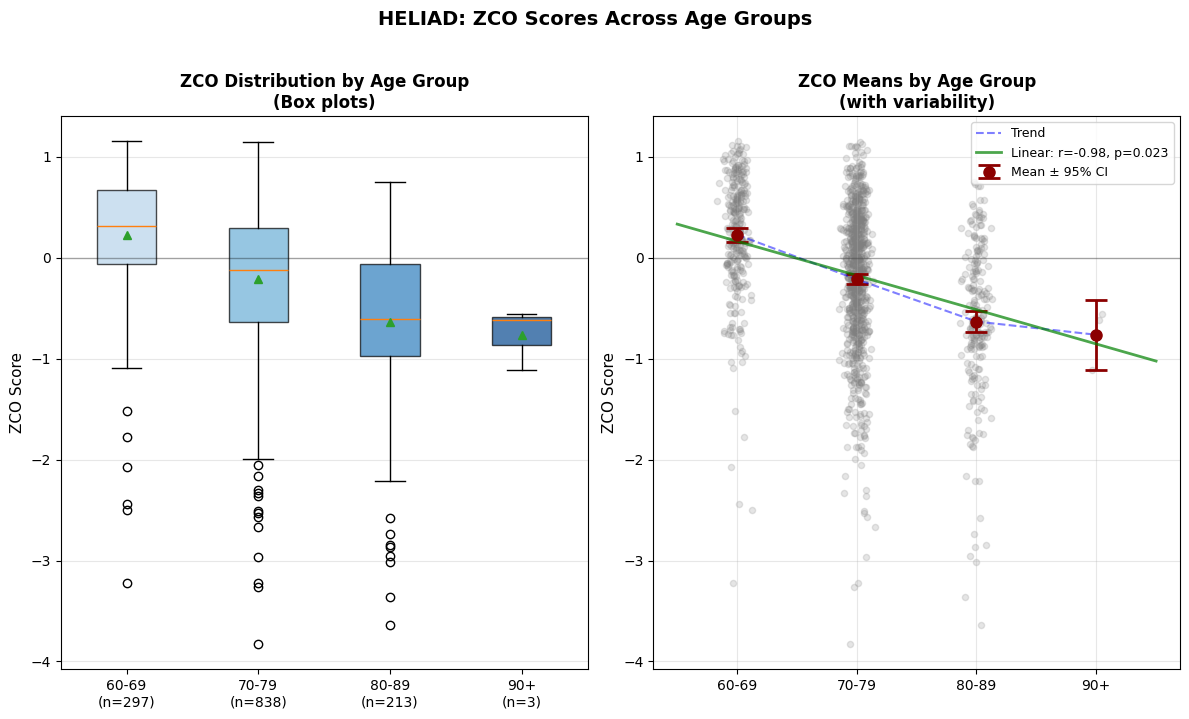

In [138]:
import matplotlib.pyplot as plt
import numpy as np

age_groups_data = []
age_labels_clean = []
age_group_counts = []

for age_group in labels:
    mask = (heliad_subset['age_group'] == age_group) & heliad_subset['ZCO'].notna()
    group_data = heliad_subset.loc[mask, 'ZCO']

    age_groups_data.append(group_data)
    age_labels_clean.append(f"{age_group}\n(n={len(group_data)})")
    age_group_counts.append(len(group_data))

plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
box = plt.boxplot(age_groups_data, patch_artist=True, showmeans=True)

colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(age_groups_data)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.xticks(range(1, len(age_labels_clean) + 1), age_labels_clean)
plt.ylabel('ZCO Score', fontsize=11)
plt.title('ZCO Distribution by Age Group\n(Box plots)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3, axis='y')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)

plt.subplot(1, 2, 2)

means = [data.mean() for data in age_groups_data]
stds = [data.std() for data in age_groups_data]
counts = [len(data) for data in age_groups_data]

ci = [1.96 * (std / np.sqrt(n)) for std, n in zip(stds, counts)]

x_pos = range(1, len(age_labels_clean) + 1)
plt.errorbar(x_pos, means, yerr=ci, fmt='o', capsize=8, capthick=2,
            color='darkred', linewidth=2, markersize=8,
            label='Mean ± 95% CI')

for i, data in enumerate(age_groups_data):
    x_jitter = np.random.normal(i+1, 0.05, len(data))
    plt.scatter(x_jitter, data, alpha=0.2, s=20, color='gray')

if len(means) >= 3:
    plt.plot(x_pos, means, 'b--', alpha=0.5, linewidth=1.5, label='Trend')
    
    from scipy import stats
    slope, intercept, r_value, p_value, _ = stats.linregress(x_pos, means)
    if p_value < 0.1: 
        x_line = np.array([0.5, len(x_pos) + 0.5])
        y_line = intercept + slope * x_line
        plt.plot(x_line, y_line, 'g-', alpha=0.7, linewidth=2,
                label=f'Linear: r={r_value:.2f}, p={p_value:.3f}')

plt.xticks(x_pos, [label.split('\n')[0] for label in age_labels_clean])
plt.ylabel('ZCO Score', fontsize=11)
plt.title('ZCO Means by Age Group\n(with variability)', fontsize=12, fontweight='bold')
plt.legend(fontsize=9, loc='best')
plt.grid(alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)

plt.suptitle('HELIAD: ZCO Scores Across Age Groups', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [142]:
medians = [data.median() for data in age_groups_data]

In [146]:
age_labels_clean

['60-69\n(n=297)', '70-79\n(n=838)', '80-89\n(n=213)', '90+\n(n=3)']

In [204]:
food_singles = [f"{v}_ZC" for v in single_items.values()]
food_groups = [f"{v}_ZC" for v in nutri_dict_grouped.keys()]
nutrition_cols = food_singles + food_groups

### Correlation between nutrients (singles and groups) and ZCO (assumed composite cognitive score)
___
Here, we investigate which nutrients correlate with the composite cognitive score (ZCO) and how. From the result, foods should emerge, that have either a positive or a negative statistical impact on cognitive performance in the overal population of the study.


1. Split into groups performing under and over (or at) the median ZCO

In [203]:
zco_median = heliad_subset['ZCO'].median()
heliad_subset['ZCO_category'] = np.where(
    heliad_subset['ZCO'] < zco_median,
    'Below Median ZCO',
    'Above Median ZCO'
)

print(f"Median ZCO score: {zco_median:.3f}")
print(f"Participants below median: {sum(heliad_subset['ZCO_category'] == 'Below Median ZCO')}")
print(f"Participants above median: {sum(heliad_subset['ZCO_category'] == 'Above Median ZCO')}")

Median ZCO score: -0.075
Participants below median: 675
Participants above median: 676


2. For each food, test if the consumption is significantly different between below-median and above-median ZCO performers.

In [209]:
results = []
for nutrient in nutrition_cols:
    below_data = heliad_subset.loc[
        heliad_subset['ZCO_category'] == 'Below Median ZCO', 
        nutrient
    ].dropna()
    
    above_data = heliad_subset.loc[
        heliad_subset['ZCO_category'] == 'Above Median ZCO', 
        nutrient
    ].dropna()
    
    if len(below_data) < 10 or len(above_data) < 10:
        continue
    
    h_stat, p_value = stats.kruskal(below_data, above_data)
    
    n_total = len(below_data) + len(above_data)
    epsilon_sq = (h_stat - 1) / (n_total - 2) if n_total > 2 else np.nan
    
    results.append({
        'Nutrient': nutrient,
        'Kruskal_H': h_stat,
        'P_value': p_value,
        'Effect_Size_epsilon2': epsilon_sq,
        'Below_Median': below_data.median(),
        'Above_Median': above_data.median(),
        'Median_Difference': above_data.median() - below_data.median(),
        'N_below': len(below_data),
        'N_above': len(above_data)
    })

results_df = pd.DataFrame(results)
results_df.head()

,Nutrient,Kruskal_H,P_value,Effect_Size_epsilon2,Below_Median,Above_Median,Median_Difference,N_below,N_above
0,Eggs_ZC,0.475263,4.905757e-01,-0.000389,-0.396687,-0.396687,0.000000,675,676
1,Chicken_ZC,2.219860,1.362454e-01,0.000904,0.718340,0.718340,0.000000,675,676
2,Legumes_ZC,0.093479,7.598002e-01,-0.000672,0.397937,0.397937,0.000000,675,676
3,Petit_Pois_ZC,46.806408,7.835677e-12,0.033956,-0.401109,0.914177,1.315286,675,676
4,Fruits_Dried_ZC,6.790748,9.163149e-03,0.004293,-0.455731,-0.455731,0.000000,675,676


3. Perform multiple hypothesis testing and correct P-values retrieved from Kruskal-Wallis test.

In [211]:
from statsmodels.stats.multitest import multipletests

rejected, pvals_corrected, _, _ = multipletests(
    results_df['P_value'], 
    alpha=0.05, 
    method='fdr_bh'
)
results_df['P_value_FDR'] = pvals_corrected
results_df['Significant_FDR'] = rejected

print(f"\nFDR correction results:")
print(f"Significant at α=0.05: {sum(rejected)} of {len(rejected)} nutrients")


FDR correction results:
Significant at α=0.05: 10 of 24 nutrients


4. A slope, calculated via linear regression, will tell the direction of the effect, evoked by consumption of specific foods.

In [ ]:
regression_results = []
for nutrient in nutrition_cols:
    clean_data = heliad_subset[[nutrient, 'ZCO']].dropna()
    if len(clean_data) < 20:
        continue
    
    X = clean_data[nutrient]
    y = clean_data['ZCO']
    
    slope, intercept, r_value, p_reg, _ = stats.linregress(X, y)
    
    regression_results.append({
        'Nutrient': nutrient,
        'Regression_Slope': slope,
        'Regression_P': p_reg,
        'Correlation_r': r_value,
        'Correlation_r2': r_value**2,
        'N_regression': len(clean_data)
    })

reg_df = pd.DataFrame(regression_results)

full_results = results_df.merge(reg_df, on='Nutrient', how='left')


In [226]:
full_results[full_results['Regression_Slope'] < 0]

,Nutrient,Kruskal_H,P_value,Effect_Size_epsilon2,Below_Median,Above_Median,Median_Difference,N_below,N_above,P_value_FDR,Significant_FDR,Regression_Slope,Regression_P,Correlation_r,Correlation_r2,N_regression,Impact_Category
0,Eggs_ZC,0.475263,0.490576,-0.000389,-0.396687,-0.396687,0.000000,675,676,0.617021,False,-0.009979,0.627176,-0.013226,1.749268e-04,1351,Not Significant
9,Olive_Oil_Freq_ZC,3.879736,0.048872,0.002135,-0.361809,-0.361809,0.000000,675,676,0.103333,False,-0.059118,0.003955,-0.078355,6.139453e-03,1351,Not Significant
10,Seed_Oil_Freq_ZC,0.008596,0.926130,-0.000735,-0.615968,-0.615968,0.000000,675,676,0.926130,False,-0.000572,0.977775,-0.000759,5.755318e-07,1351,Not Significant
22,Sweets_ZC,0.560247,0.454161,-0.000326,-0.020172,-0.025050,-0.004878,675,676,0.605548,False,-0.032368,0.376614,-0.024073,5.795315e-04,1351,Not Significant


5. A simple classification for whether a statistically significant result was achieved, followed by the direction of the slope categorizes the foods according the their effect. A negative slope means that a food had a negative impact, leading to a lower cognitive performance score and a positive slope that a food (or group of foods) had a benefitial effect.

In [ ]:
def classify_nutrient(row):
    if not row['Significant_FDR']:
        return 'Not Significant'
    if row['Regression_Slope'] > 0:
        return 'Positive Impact'
    else:
        return 'Negative Impact'

full_results['Impact_Category'] = full_results.apply(classify_nutrient, axis=1)

category_counts = full_results['Impact_Category'].value_counts()
for category, count in category_counts.items():
    print(f"{category}: {count} nutrients")

Not Significant: 14 nutrients
Positive Impact: 10 nutrients


6. A depiction of the five topmost foods with an assumed positive impact, ranked by the FDR corrected p-value.

In [216]:
top_positive = full_results[
    (full_results['Impact_Category'] == 'Positive Impact')
].sort_values('P_value_FDR').head(5)

print("\nTOP 5 POSITIVE IMPACT (protective):")
print("-" * 60)
for _, row in top_positive.iterrows():
    print(f"{row['Nutrient']:25}")
    print(f"  FDR p-value: {row['P_value_FDR']:.2e}")
    print(f"  Regression slope: {row['Regression_Slope']:.3f} (per 1 SD increase)")
    print(f"  Median diff: {row['Median_Difference']:.3f} (Above - Below Median ZCO)")
    print(f"  Correlation r: {row['Correlation_r']:.3f}")
    print()


TOP 5 POSITIVE IMPACT (protective):
------------------------------------------------------------
Petit_Pois_ZC            
  FDR p-value: 1.88e-10
  Regression slope: 0.159 (per 1 SD increase)
  Median diff: 1.315 (Above - Below Median ZCO)
  Correlation r: 0.211

Vegetables_ZC            
  FDR p-value: 9.36e-09
  Regression slope: 0.254 (per 1 SD increase)
  Median diff: 0.177 (Above - Below Median ZCO)
  Correlation r: 0.183

Whole_Grains_ZC          
  FDR p-value: 7.50e-08
  Regression slope: 0.210 (per 1 SD increase)
  Median diff: 0.332 (Above - Below Median ZCO)
  Correlation r: 0.190

Nuts_ZC                  
  FDR p-value: 2.26e-06
  Regression slope: 0.099 (per 1 SD increase)
  Median diff: 0.812 (Above - Below Median ZCO)
  Correlation r: 0.131

Dairy_ZC                 
  FDR p-value: 5.99e-06
  Regression slope: 0.270 (per 1 SD increase)
  Median diff: 0.064 (Above - Below Median ZCO)
  Correlation r: 0.144



7. Respectively, foods with a negative impact are presented. Yet this analysis yielded no statistically significant results for this category.

In [218]:
top_negative = full_results[
    (full_results['Impact_Category'] == 'Negative Impact')
].sort_values('P_value_FDR').head(5)

print("\nTOP 5 NEGATIVE IMPACT (harmful):")
print("-" * 60)
for _, row in top_negative.iterrows():
    print(f"{row['Nutrient']:25}")
    print(f"  FDR p-value: {row['P_value_FDR']:.2e}")
    print(f"  Regression slope: {row['Regression_Slope']:.3f} (per 1 SD increase)")
    print(f"  Median diff: {row['Median_Difference']:.3f} (Above - Below Median ZCO)")
    print(f"  Correlation r: {row['Correlation_r']:.3f}")
    print()


TOP 5 NEGATIVE IMPACT (harmful):
------------------------------------------------------------


8. Visualizations of foods and their impact on the whole study population. The 'best' one are petit-pois, yielding the lowest FDR p-value, whereas there are further statistically significant results with a steeper slope.

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_18621/837013815.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=heliad_subset, x='ZCO_category', y=top_nutrient,


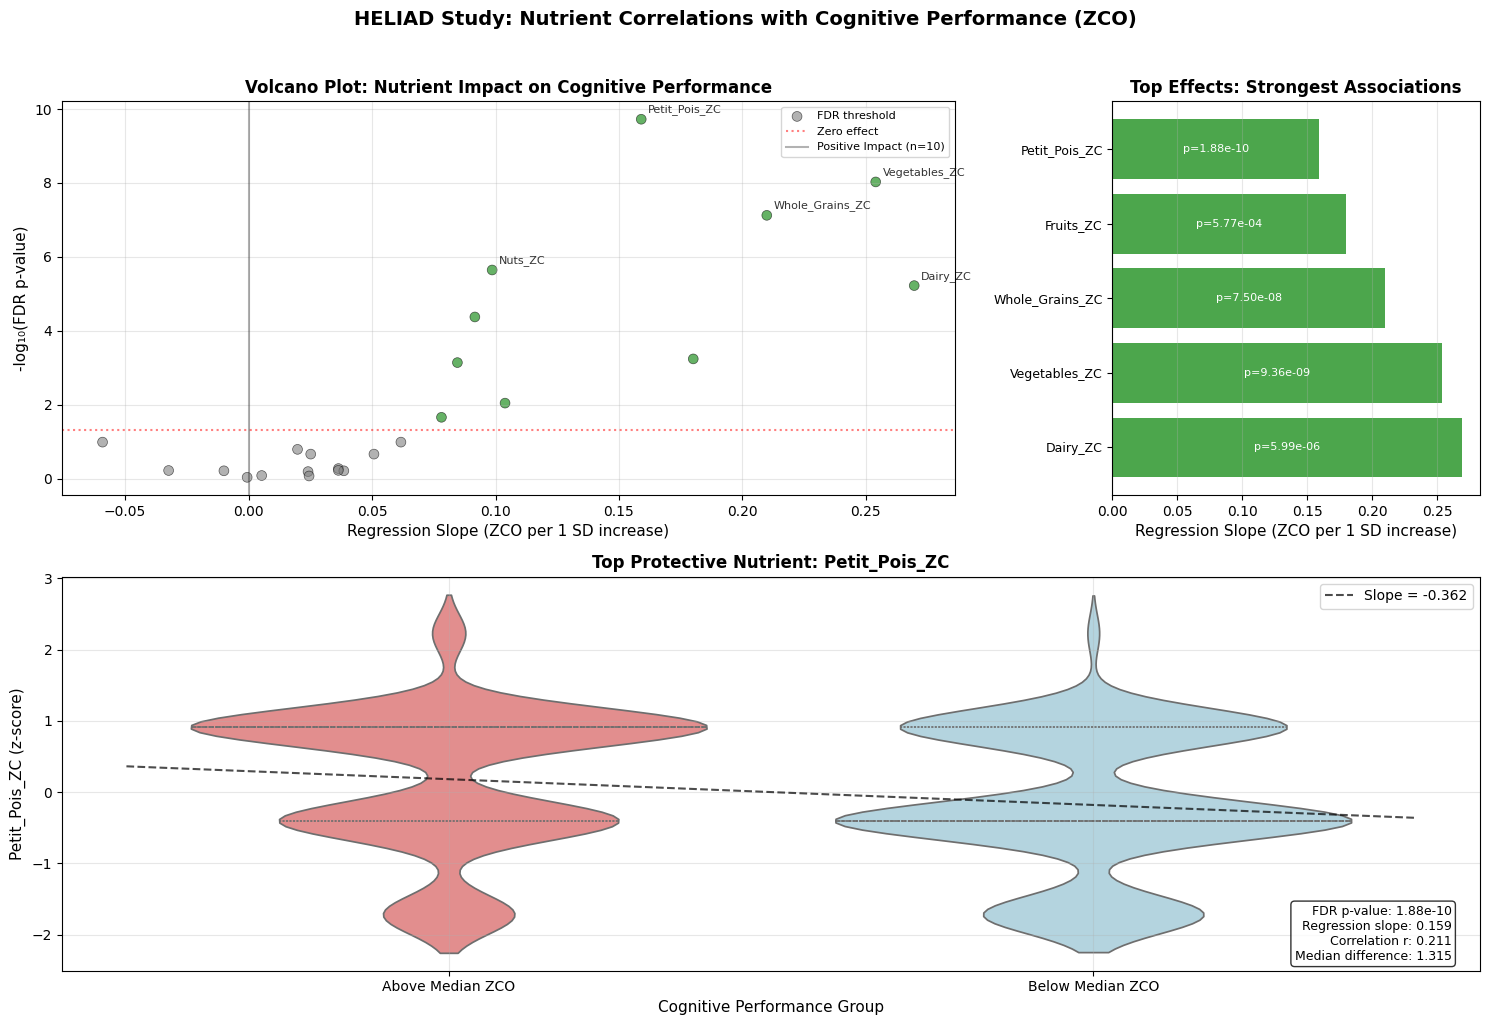

In [232]:
fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=2)

plot_data = full_results.copy()
plot_data['neg_log_p'] = -np.log10(plot_data['P_value_FDR'])

colors = {
    'Positive Impact': 'green',
    'Negative Impact': 'red',
    'Not Significant': 'gray'
}
plot_data['color'] = plot_data['Impact_Category'].map(colors)
scatter = ax1.scatter(plot_data['Regression_Slope'], 
                      plot_data['neg_log_p'],
                      c=plot_data['color'], 
                      alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

ax1.axhline(y=-np.log10(0.05), color='red', linestyle=':', alpha=0.5, 
           label='FDR α=0.05')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)

top_labels = pd.concat([top_positive.head(5), top_negative.head(5)])
for _, row in top_labels.iterrows():
    ax1.annotate(row['Nutrient'], 
                (row['Regression_Slope'], -np.log10(row['P_value_FDR'])),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

ax1.set_xlabel('Regression Slope (ZCO per 1 SD increase)', fontsize=11)
ax1.set_ylabel('-log₁₀(FDR p-value)', fontsize=11)
ax1.set_title('Volcano Plot: Nutrient Impact on Cognitive Performance', 
             fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.legend(['FDR threshold', 'Zero effect'] + 
           [f'{cat} (n={category_counts.get(cat, 0)})' 
            for cat in ['Positive Impact', 'Negative Impact', 'Not Significant']],
           fontsize=8)

ax2 = plt.subplot2grid((2, 3), (0, 2))

effect_data = full_results[full_results['Significant_FDR'] == True].sort_values('Regression_Slope', ascending=False)
pos_effects = effect_data[effect_data['Regression_Slope'] > 0].head(5)
neg_effects = effect_data[effect_data['Regression_Slope'] < 0].head(5)
top_effects = pd.concat([pos_effects, neg_effects])

y_pos = np.arange(len(top_effects))
ax2.barh(y_pos, top_effects['Regression_Slope'], 
         color=['green' if x > 0 else 'red' for x in top_effects['Regression_Slope']],
         alpha=0.7)

ax2.set_yticks(y_pos)
ax2.set_yticklabels(top_effects['Nutrient'], fontsize=9)
ax2.set_xlabel('Regression Slope (ZCO per 1 SD increase)', fontsize=11)
ax2.set_title('Top Effects: Strongest Associations', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)

for i, (_, row) in enumerate(top_effects.iterrows()):
    ax2.text(row['Regression_Slope']/2, i, 
             f"p={row['P_value_FDR']:.2e}", 
             ha='center', va='center', fontsize=8,
             color='white' if abs(row['Regression_Slope']) > 0.1 else 'black')
ax3 = plt.subplot2grid((2, 3), (1, 0), colspan=3)

if len(top_positive) > 0:
    top_nutrient = top_positive.iloc[0]['Nutrient']

    import seaborn as sns
    sns.violinplot(data=heliad_subset, x='ZCO_category', y=top_nutrient,
                   inner='quartile', ax=ax3, palette=['lightcoral', 'lightblue'])
    x_vals = pd.factorize(heliad_subset['ZCO_category'])[0]
    slope, intercept, _, _, _ = stats.linregress(
        x_vals[~heliad_subset[top_nutrient].isna()],
        heliad_subset[top_nutrient].dropna()
    )
    x_range = np.array([-0.5, 1.5])
    ax3.plot(x_range, intercept + slope * x_range, 
             'k--', alpha=0.7, label=f'Slope = {slope:.3f}')
    stats_text = (
        f"FDR p-value: {top_positive.iloc[0]['P_value_FDR']:.2e}\n"
        f"Regression slope: {top_positive.iloc[0]['Regression_Slope']:.3f}\n"
        f"Correlation r: {top_positive.iloc[0]['Correlation_r']:.3f}\n"
        f"Median difference: {top_positive.iloc[0]['Median_Difference']:.3f}"
    )
    
    ax3.text(0.98, 0.02, stats_text, transform=ax3.transAxes,
             fontsize=9, verticalalignment='bottom', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax3.set_xlabel('Cognitive Performance Group', fontsize=11)
    ax3.set_ylabel(f'{top_nutrient} (z-score)', fontsize=11)
    ax3.set_title(f'Top Protective Nutrient: {top_nutrient}', 
                 fontsize=12, fontweight='bold')
    ax3.legend()
    ax3.grid(alpha=0.3)

plt.suptitle('HELIAD Study: Nutrient Correlations with Cognitive Performance (ZCO)', 
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


### Insights from the age groups regarding consumption of highly beneficial foods
___
Here, we try to test our assumption of the top-performing foods in regards to cognitive prowess for distinct age groups. Does the assumption hold for ages 60-69, 70-79, 80-89?

In [233]:
age_groups = ['60-69', '70-79', '80-89', '90+']

HELIAD: Food-Cognition Associations WITHIN Age Groups

AGE GROUP: 60-69
  Participants: 297
  ZCO median in this age group: 0.312
  Below median: 148
  Above median: 149

  SIGNIFICANT FOODS in 60-69 (FDR-corrected):
  --------------------------------------------------
  • Petit_Pois_ZC        ↑ Protective
    P(FDR)=0.0007, Δmedian=1.315
    Below: -0.401, Above: 0.914
    Effect: small (rbc=0.237)

  • Whole_Grains_ZC      ↑ Protective
    P(FDR)=0.0008, Δmedian=0.498
    Below: -0.405, Above: 0.093
    Effect: small (rbc=0.227)

  • Vegetables_ZC        ↑ Protective
    P(FDR)=0.0065, Δmedian=0.244
    Below: -0.057, Above: 0.187
    Effect: small (rbc=0.188)

  • Dairy_ZC             ↑ Protective
    P(FDR)=0.0063, Δmedian=0.143
    Below: -0.074, Above: 0.069
    Effect: small (rbc=0.194)

  ALL FOODS in 60-69:
  --------------------------------------------------
  Petit_Pois_ZC        ↑ Protective    p=0.0001*** Δ=1.315
  Whole_Grains_ZC      ↑ Protective    p=0.0003*** Δ=0.498
 

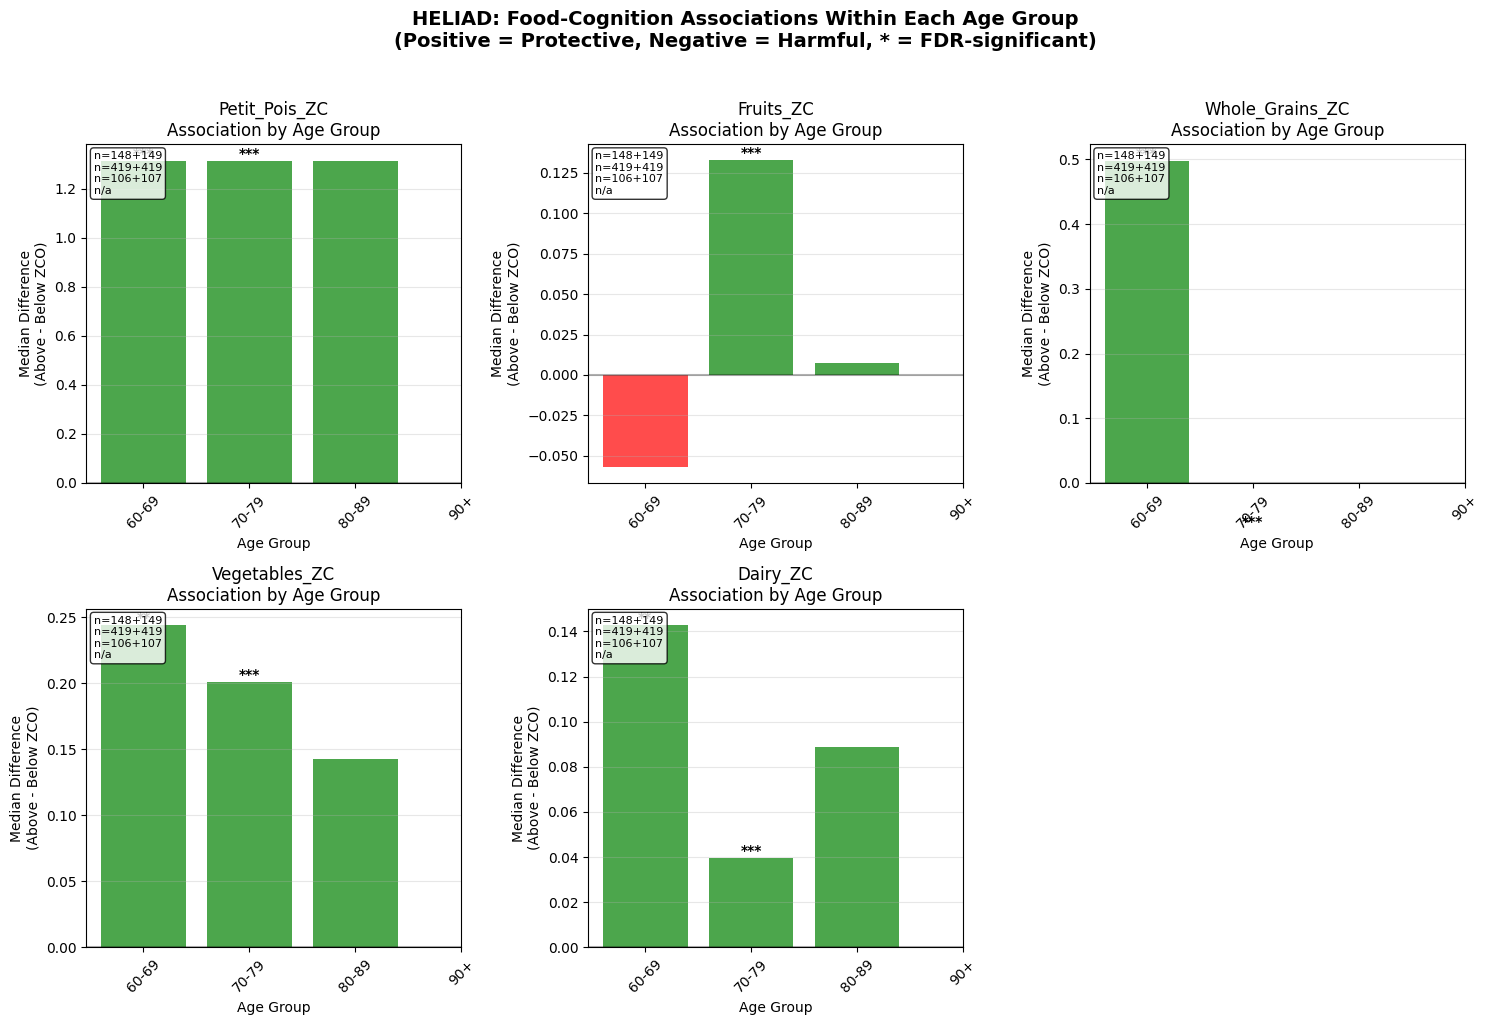


CONSISTENCY ANALYSIS: Foods with Same Direction Across Age Groups
              Food  Age_Groups_Tested Consistent_Direction  Positive_in_N_groups  Negative_in_N_groups  Sig_Positive_in_N  Sig_Negative_in_N Most_Common_Direction
0    Petit_Pois_ZC                  3           Consistent                     3                     0                  2                  0              Positive
1        Fruits_ZC                  3                Mixed                     2                     1                  1                  0              Positive
2  Whole_Grains_ZC                  3                Mixed                     1                     0                  1                  0              Positive
3    Vegetables_ZC                  3           Consistent                     3                     0                  2                  0              Positive
4         Dairy_ZC                  3           Consistent                     3                     0                

In [243]:
"""
HELIAD Study: Food-cognition associations WITHIN each age group
Test which foods differ between high/low ZCO performers in each age bracket
"""

print("="*80)
print("HELIAD: Food-Cognition Associations WITHIN Age Groups")
print("="*80)

# Your top foods
top_foods = ['Petit_Pois_ZC', 'Fruits_ZC', 'Whole_Grains_ZC', 'Vegetables_ZC', 'Dairy_ZC']

# Age groups
age_groups = ['60-69', '70-79', '80-89', '90+']

# Prepare storage for results
age_group_results = []

# For EACH age group, test EACH food
for age_group in age_groups:
    print(f"\n{'='*60}")
    print(f"AGE GROUP: {age_group}")
    print(f"{'='*60}")
    
    # Subset for this age group
    age_subset = heliad_subset[heliad_subset['age_group'] == age_group].copy()
    
    if len(age_subset) < 20:  # Skip if too few participants
        print(f"  Too few participants (n={len(age_subset)}), skipping...")
        continue
    
    # Create ZCO categories WITHIN this age group
    zco_median_age = age_subset['ZCO'].median()
    age_subset['ZCO_category_age'] = np.where(
        age_subset['ZCO'] < zco_median_age,
        'Below Median (within age)',
        'Above Median (within age)'
    )
    
    print(f"  Participants: {len(age_subset)}")
    print(f"  ZCO median in this age group: {zco_median_age:.3f}")
    print(f"  Below median: {sum(age_subset['ZCO_category_age'] == 'Below Median (within age)')}")
    print(f"  Above median: {sum(age_subset['ZCO_category_age'] == 'Above Median (within age)')}")
    
    # Test each food
    food_results_age = []
    
    for food in top_foods:
        # Check if we have data
        if food not in age_subset.columns:
            continue
            
        below_data = age_subset.loc[
            age_subset['ZCO_category_age'] == 'Below Median (within age)', 
            food
        ].dropna()
        
        above_data = age_subset.loc[
            age_subset['ZCO_category_age'] == 'Above Median (within age)', 
            food
        ].dropna()
        
        # Skip if insufficient data
        if len(below_data) < 5 or len(above_data) < 5:
            continue
        
        # Mann-Whitney U test (non-parametric for 2 groups)
        u_stat, p_mw = stats.mannwhitneyu(below_data, above_data, 
                                         alternative='two-sided')
        
        # Calculate effect size (rank-biserial correlation)
        n1, n2 = len(below_data), len(above_data)
        rbc = 1 - (2 * u_stat) / (n1 * n2)  # Rank-biserial correlation
        
        # Interpret effect size
        if abs(rbc) < 0.1:
            effect_size = 'negligible'
        elif abs(rbc) < 0.3:
            effect_size = 'small'
        elif abs(rbc) < 0.5:
            effect_size = 'medium'
        else:
            effect_size = 'large'
        
        # Direction based on medians
        median_diff = above_data.median() - below_data.median()
        direction = '↑ Protective' if median_diff > 0 else '↓ Harmful'
        
        food_results_age.append({
            'Age_Group': age_group,
            'Food': food,
            'U_statistic': u_stat,
            'P_value': p_mw,
            'P_value_FDR': np.nan,  # Will correct across foods within age group
            'Below_Median': below_data.median(),
            'Above_Median': above_data.median(),
            'Median_Difference': median_diff,
            'Effect_Size_rbc': rbc,
            'Effect_Size_Interpretation': effect_size,
            'Direction': direction,
            'N_below': len(below_data),
            'N_above': len(above_data),
            'Significant_Raw': p_mw < 0.05
        })
    
    # Convert to DataFrame for this age group
    if food_results_age:
        age_df = pd.DataFrame(food_results_age)
        
        # Apply FDR correction WITHIN this age group
        rejected, pvals_fdr, _, _ = multipletests(
            age_df['P_value'], alpha=0.05, method='fdr_bh'
        )
        age_df['P_value_FDR'] = pvals_fdr
        age_df['Significant_FDR'] = rejected
        
        # Store for combined analysis
        age_group_results.append(age_df)
        
        # Print significant results for this age group
        sig_foods = age_df[age_df['Significant_FDR']]
        if len(sig_foods) > 0:
            print(f"\n  SIGNIFICANT FOODS in {age_group} (FDR-corrected):")
            print("  " + "-" * 50)
            for _, row in sig_foods.iterrows():
                print(f"  • {row['Food']:20} {row['Direction']}")
                print(f"    P(FDR)={row['P_value_FDR']:.4f}, Δmedian={row['Median_Difference']:.3f}")
                print(f"    Below: {row['Below_Median']:.3f}, Above: {row['Above_Median']:.3f}")
                print(f"    Effect: {row['Effect_Size_Interpretation']} (rbc={row['Effect_Size_rbc']:.3f})")
                print()
        else:
            print(f"\n  No significant foods found in {age_group} after FDR correction")
        
        # Print all foods for reference
        print(f"  ALL FOODS in {age_group}:")
        print("  " + "-" * 50)
        for _, row in age_df.sort_values('P_value').iterrows():
            sig_marker = "***" if row['P_value_FDR'] < 0.001 else "**" if row['P_value_FDR'] < 0.01 else "*" if row['P_value_FDR'] < 0.05 else ""
            print(f"  {row['Food']:20} {row['Direction']:15} "
                  f"p={row['P_value']:.4f}{sig_marker} "
                  f"Δ={row['Median_Difference']:.3f}")

# Combine all age group results
if age_group_results:
    all_age_results = pd.concat(age_group_results, ignore_index=True)
    
    # 2. VISUALIZATION: Age group patterns
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, food in enumerate(top_foods):
        if idx < len(axes):
            ax = axes[idx]
            
            # Get data for this food across age groups
            food_data = all_age_results[all_age_results['Food'] == food]
            
            if len(food_data) > 0:
                # Plot median differences with confidence
                age_order = ['60-69', '70-79', '80-89', '90+']
                diffs = []
                pvals = []
                
                for age in age_order:
                    row = food_data[food_data['Age_Group'] == age]
                    if len(row) > 0:
                        diffs.append(row.iloc[0]['Median_Difference'])
                        pvals.append(row.iloc[0]['P_value_FDR'])
                    else:
                        diffs.append(np.nan)
                        pvals.append(np.nan)
                
                # Bar plot
                bars = ax.bar(range(len(diffs)), diffs, 
                             color=['green' if d > 0 else 'red' if d < 0 else 'gray' 
                                    for d in diffs],
                             alpha=0.7)
                
                # Add significance stars
                for i, (diff, pval) in enumerate(zip(diffs, pvals)):
                    if not np.isnan(pval):
                        if pval < 0.001:
                            sig = '***'
                        elif pval < 0.01:
                            sig = '**'
                        elif pval < 0.05:
                            sig = '*'
                        else:
                            sig = ''
                        
                        # Position text above bar
                        height = diff if diff > 0 else diff - 0.05
                        ax.text(i, height, sig, ha='center', va='bottom' if diff > 0 else 'top',
                               fontsize=10, fontweight='bold')
                
                ax.set_xticks(range(len(age_order)))
                ax.set_xticklabels(age_order, rotation=45)
                ax.set_xlabel('Age Group')
                ax.set_ylabel('Median Difference\n(Above - Below ZCO)')
                ax.set_title(f'{food}\nAssociation by Age Group')
                ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
                ax.grid(axis='y', alpha=0.3)
                
                # Add sample size annotation
                sample_text = []
                for age in age_order:
                    row = food_data[food_data['Age_Group'] == age]
                    if len(row) > 0:
                        n_below = row.iloc[0]['N_below']
                        n_above = row.iloc[0]['N_above']
                        sample_text.append(f"n={n_below}+{n_above}")
                    else:
                        sample_text.append("n/a")
                
                ax.text(0.02, 0.98, '\n'.join(sample_text), 
                       transform=ax.transAxes, fontsize=8,
                       verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Hide unused subplots
    for idx in range(len(top_foods), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('HELIAD: Food-Cognition Associations Within Each Age Group\n'
                '(Positive = Protective, Negative = Harmful, * = FDR-significant)', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # 3. CONSISTENCY ANALYSIS: Which foods show consistent effects?
    print("\n" + "="*80)
    print("CONSISTENCY ANALYSIS: Foods with Same Direction Across Age Groups")
    print("="*80)
    
    consistency_results = []
    for food in top_foods:
        food_data = all_age_results[all_age_results['Food'] == food]
        
        if len(food_data) > 0:
            # Count directions
            n_positive = sum(food_data['Median_Difference'] > 0)
            n_negative = sum(food_data['Median_Difference'] < 0)
            n_sig_positive = sum((food_data['Median_Difference'] > 0) & 
                                (food_data['Significant_FDR']))
            n_sig_negative = sum((food_data['Median_Difference'] < 0) & 
                                (food_data['Significant_FDR']))
            
            consistency = 'Consistent' if n_positive == len(food_data) or n_negative == len(food_data) else 'Mixed'
            
            consistency_results.append({
                'Food': food,
                'Age_Groups_Tested': len(food_data),
                'Consistent_Direction': consistency,
                'Positive_in_N_groups': n_positive,
                'Negative_in_N_groups': n_negative,
                'Sig_Positive_in_N': n_sig_positive,
                'Sig_Negative_in_N': n_sig_negative,
                'Most_Common_Direction': 'Positive' if n_positive > n_negative else 'Negative'
            })
    
    consistency_df = pd.DataFrame(consistency_results)
    print(consistency_df.to_string())
    
    # 4. EXPORT RESULTS
    print("\n" + "="*80)
    print("EXPORTING AGE-STRATIFIED RESULTS")
    print("="*80)
    
    # Save detailed results
    output_cols = [
        'Age_Group', 'Food', 'P_value', 'P_value_FDR', 'Significant_FDR',
        'Below_Median', 'Above_Median', 'Median_Difference', 'Direction',
        'Effect_Size_rbc', 'Effect_Size_Interpretation',
        'U_statistic', 'N_below', 'N_above'
    ]
    
    all_age_results[output_cols].sort_values(['Age_Group', 'P_value_FDR']).to_csv(
        'HELIAD_age_stratified_food_associations.csv', index=False)
    
    print("Results saved to 'HELIAD_age_stratified_food_associations.csv'")

else:
    print("\nNo age groups had sufficient data for analysis!")

In [240]:
all(len(g) >= 3 for g in groups)

True